# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Marcel van de Lagemaat - 10886699 <br>
Anton Andersen - 14718758 

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq, norm
import sympy as sp
x_, y_ = sp.symbols('x y')

data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

The result of the optimization is: [0.09337229 1.90667818]


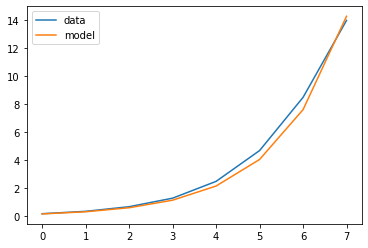

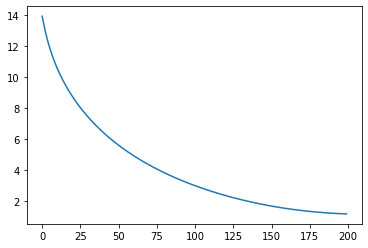

In [156]:
# YOUR CODE HERE
def gradient(x, r, t):
    x_1 = [x_ ** t_ for x_, t_ in zip(x, t)]
    x_2 = [x_ * t_ * r ** t_ for x_, t_ in zip(x, t)]
    return np.vstack([x_1, x_2])

def function(t, x, r):
    """ INPUT: t - time, x_1 - current time population, x_2 - growth rate 
        OUTPUT: Returns the population value for the following period. """
    return x * r ** t

def min_function(data, x_0, K):
    """ INPUT: data - observed data, x - initial guess for the parameters
        OUTPUT:  The estimate for the parameters of the model. """
    residual_norm = np.zeros([K])
    for k in range(K):
        model_values = np.array([function(t, x_0[0], x_0[1]) for t in range(1, len(data) + 1)]) # evaluates the model with the parameters
        r = -(data - model_values) # calcualtes the negative of the residual vector
        J = gradient(model_values, x_0[1], range(1, len(data) + 1)) # This one also needs the updated values
        s = lstsq(np.array(J.T), np.array(r).T, rcond = None)[0] # Then the lstsq solution for the jacobian and the negative of r.
        x_0 = x_0 - s # This one updates the parameters
        residual_norm[k] = norm(r, 2) # Add the 2-norm to the array.
    return x_0, residual_norm

initial = np.array([0.1, 1.5])
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]
params, residuals = min_function(np.array(data), initial, 200)
print(f'The result of the optimization is: {res}')
plt.plot(data, label = 'data')
plt.plot([function(t, params[0], params[1]) for t in range(1, len(data) + 1)], label = 'model')
plt.legend()
plt.show()
# Then one plot for the residuals
plt.plot(residuals)
plt.show()

# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


In [ ]:
# YOUR CODE HERE

Your answer here

----------------------
# Exercise 2 (4.5 points)



# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

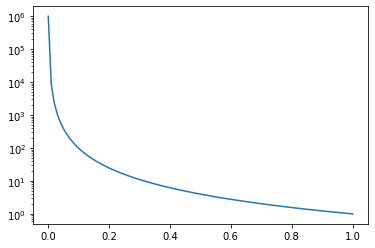

In [4]:
def f(x):
    return 1 / (x ** 2)

a = 10 ** -3
b = 1
x = np.linspace(a, b, 100)
plt.semilogy(x, f(x))
plt.show()

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [13]:
from scipy.integrate import quad
from IPython.display import display, Latex

integ = quad(f, a, b, epsabs=1e-4)
display(Latex(f'$\int_a^b f(x) \, dx = {integ[0]}$'))

<IPython.core.display.Latex object>

# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


In [ ]:
# YOUR CODE HERE

Your answer here.